### Loading the Required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/home/chaitanya/computer_vision/images/"

Size of the image is : (300, 332)


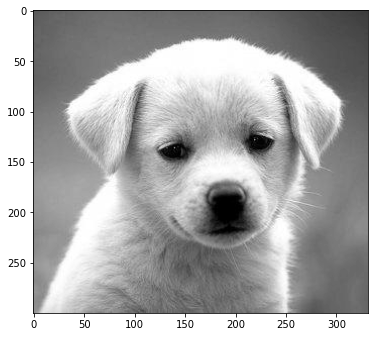

In [3]:
dog_image_path = path + "dog.jpg"
# Reading the dog image in grayscale 
dog_image = cv2.imread(dog_image_path, cv2.IMREAD_GRAYSCALE)
# Printing the size of the image
print('Size of the image is :', dog_image.shape)
# Displaying the image 
plt.figure(figsize=(6, 6))
plt.imshow(dog_image, cmap='gray')
plt.show()

In [4]:
kernel = np.array([[1, 0, -1], [2, 0, -1], [1, 0, -1]])

##### Applying convolution 

In [5]:
convolution_result = cv2.filter2D(dog_image, -1, kernel)

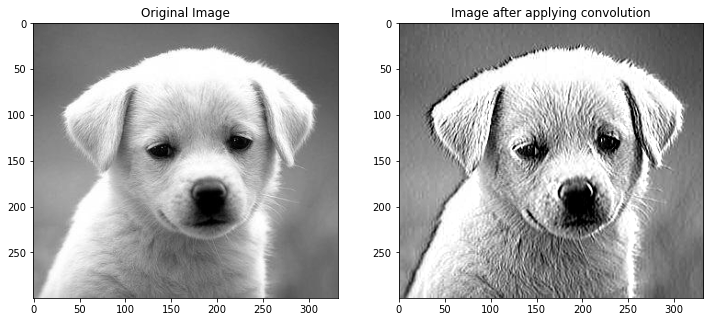

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(dog_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(convolution_result, cmap="gray")
plt.title("Image after applying convolution")
plt.show()

##### Applying correlation

In [7]:
correlation_result = cv2.filter2D(dog_image, -1, cv2.flip(kernel, - 1))

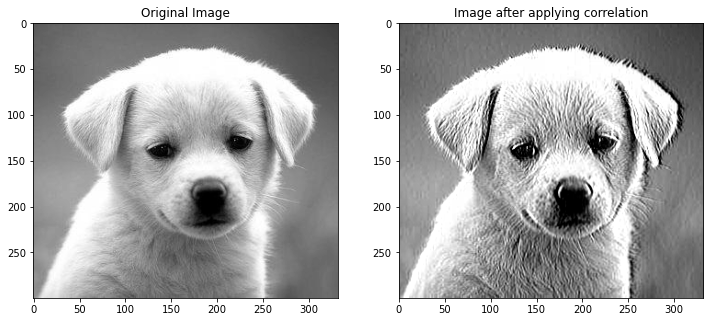

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(dog_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(correlation_result, cmap="gray")
plt.title("Image after applying correlation")
plt.show()

##### Cropping the eye part of the dog

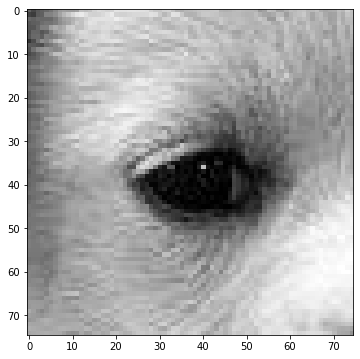

In [9]:
# Extracting a region of interest (nose) from the dog image
eye = dog_image[100:175, 100:175]
# Plotting the extracted nose region
plt.figure(figsize=(6, 6))
plt.imshow(eye, cmap='gray')
plt.show()

##### Applying impulse function

In [10]:
# When applied to an image, it will have little to no effect, 
# as it essentially preserves the original pixel values.
impulse_1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

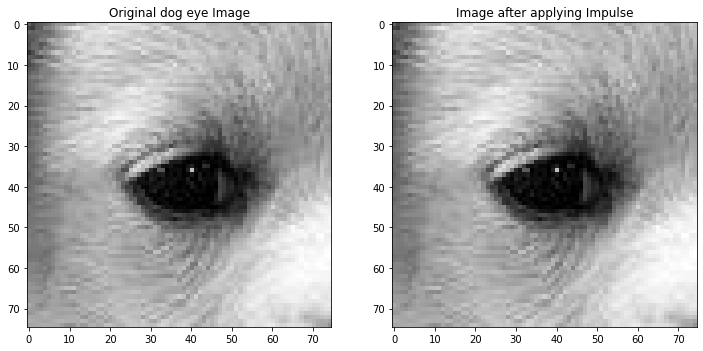

In [11]:
impulse_1_image = cv2.filter2D(eye, -1, impulse_1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(eye, cmap="gray")
plt.title("Original dog eye Image")
plt.subplot(1, 2, 2)
plt.imshow(impulse_1_image, cmap="gray")
plt.title("Image after applying Impulse")
plt.show()

In [12]:
#  When applied to an image, it may have a slight effect of shifting the intensity values to the right,
# potentially creating a slight displacement in the image.
impulse_2 = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]])

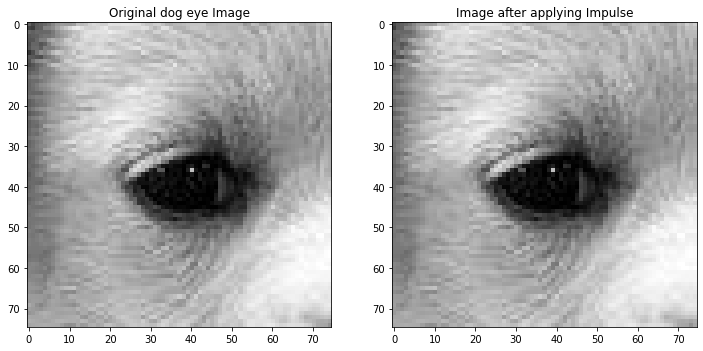

In [13]:
impulse_2_image = cv2.filter2D(eye, -1, impulse_2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(eye, cmap="gray")
plt.title("Original dog eye Image")
plt.subplot(1, 2, 2)
plt.imshow(impulse_2_image, cmap="gray")
plt.title("Image after applying Impulse")
plt.show()

In [14]:
impulse_3 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
# Normalize the impulse response to ensure the sum is 1
impulse_3 = (1/9) * impulse_3

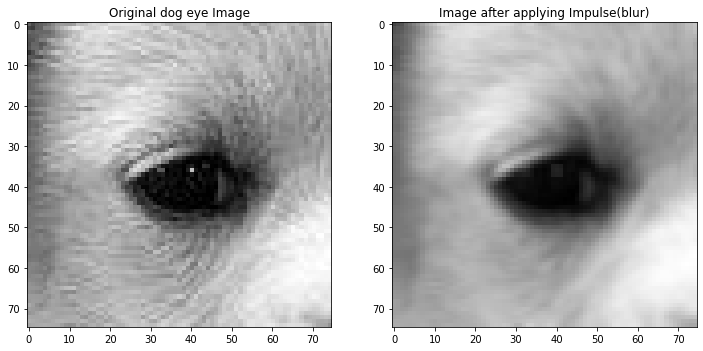

In [15]:
# Apply the blurring filter to the original dog eye image
impulse_3_image = cv2.filter2D(eye, -1, impulse_3)
# Plotting the original image and the image after applying the blurring filter
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(eye, cmap="gray")
plt.title("Original dog eye Image")
plt.subplot(1, 2, 2)
plt.imshow(impulse_3_image, cmap="gray")
plt.title("Image after applying Impulse(blur)")
plt.show()

In [16]:
# impulse response for sharpening filter
impulse_4 = np.array([[0, 0, 0], [0, 2, 0], [0, 0, 0]]) - (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

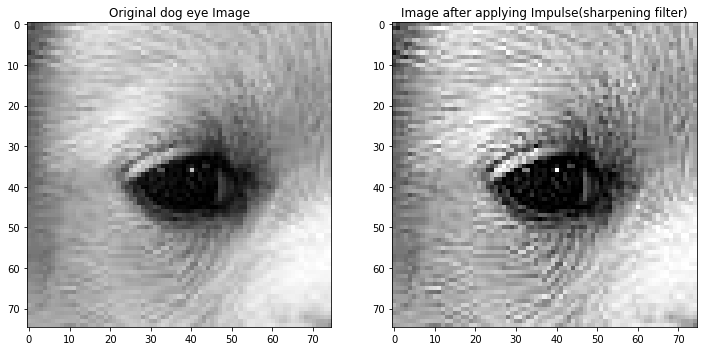

In [17]:
# Apply the sharpening filter to the original dog eye image
impulse_4_image = cv2.filter2D(eye, -1, impulse_4)
# Plotting the original image and the image after applying the sharpening filter
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(eye, cmap="gray")
plt.title("Original dog eye Image")
plt.subplot(1, 2, 2)
plt.imshow(impulse_4_image, cmap="gray")
plt.title("Image after applying Impulse(sharpening filter)")
plt.show()

##### Sharpening dog image

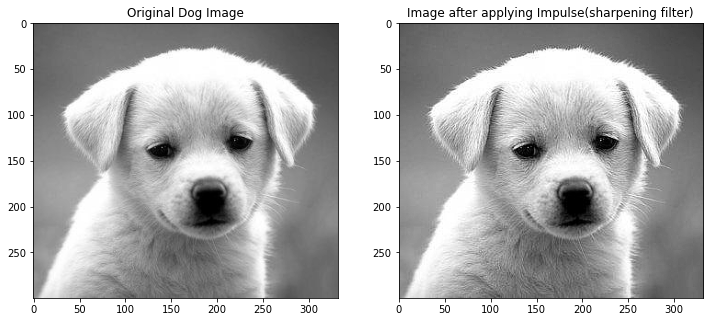

In [18]:
impulse_5_image = cv2.filter2D(dog_image, -1, impulse_4)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(dog_image, cmap="gray")
plt.title("Original Dog Image")
plt.subplot(1, 2, 2)
plt.imshow(impulse_5_image, cmap="gray")
plt.title("Image after applying Impulse(sharpening filter)")
plt.show()

##### Median filter

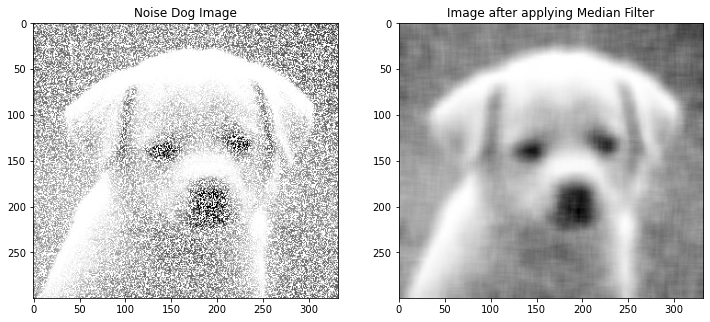

In [19]:
# Generate random binary noise (0 or 255) with the same shape as the dog image
noise = np.random.randint(0, 2, size=dog_image.shape[:2], dtype=np.uint8) * 255
# Add the generated noise to the original dog image
noise_image = cv2.add(dog_image, noise)
# Define a 15x15 kernel for the median filter
kernel = np.ones((15, 15), np.float32) / (15 * 15)
# Apply the median filter to the image with added noise
median_filter = cv2.filter2D(noise_image, -1, kernel)
# Plotting the original image with noise and the image after applying the median filter
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(noise_image, cmap="gray")
plt.title("Noise Dog Image")
plt.subplot(1, 2, 2)
plt.imshow(median_filter, cmap="gray")
plt.title("Image after applying Median Filter")
plt.show()